# Clustering Problem using Hidden Markov Model and K-Means

## Dataset

In [25]:
%matplotlib inline
from __future__ import print_function
from matplotlib import cm, pyplot as plt
from hmmlearn.hmm import GaussianHMM
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA

In [26]:
data = pd.read_csv("results.txt")
data.head()

,CPU0,CPU1,CPU2,CPU3,CPU4,CPU5,CPU6,CPU7
0,1.5,0.0,0.0,3.1,0.0,0.0,3.1,4.6
1,4.6,0.0,0.0,3.0,1.5,0.0,3.1,0.0
2,4.6,0.0,0.0,0.0,3.2,0.0,0.0,0.0
3,6.2,0.0,0.0,1.5,0.0,0.0,0.0,0.0
4,1.5,0.0,0.0,6.2,0.0,6.2,3.2,0.0


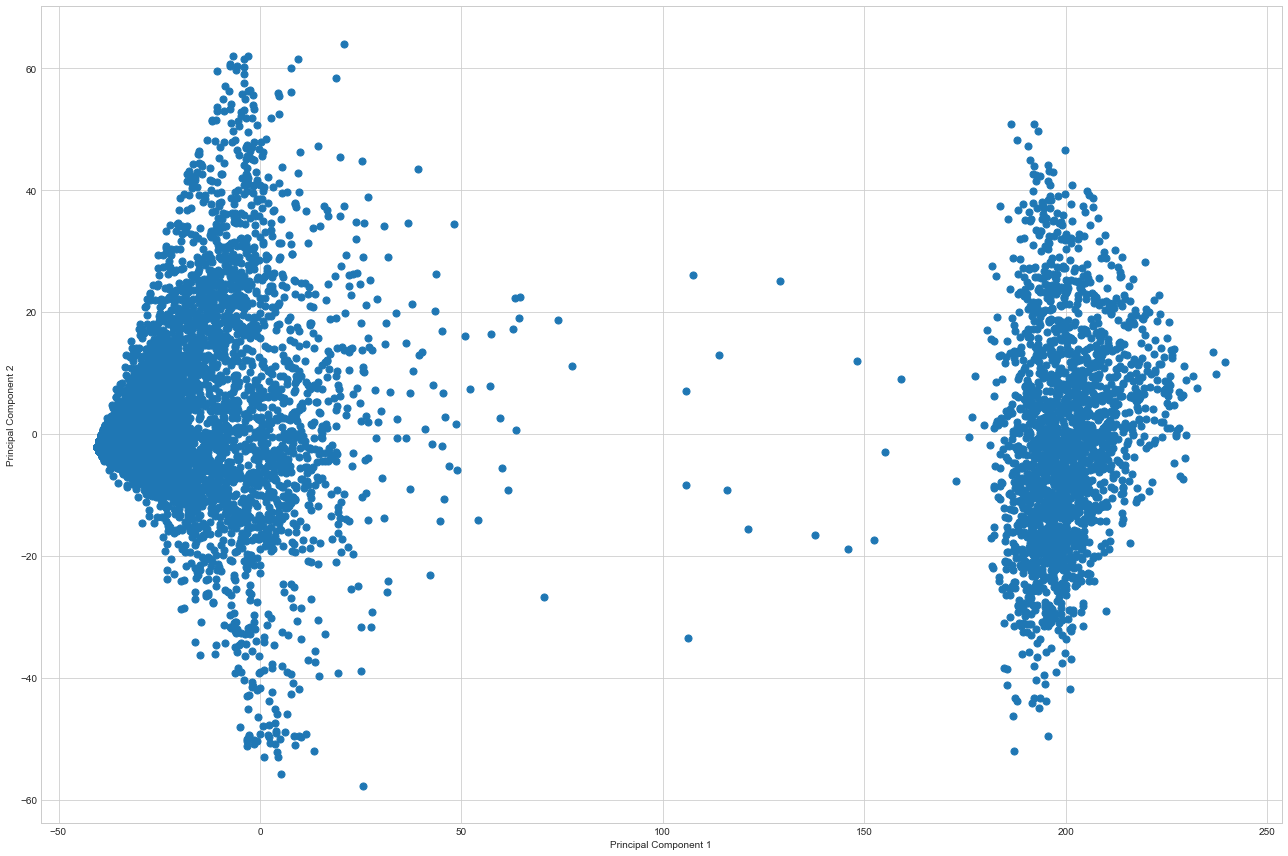

In [28]:
sklearn_pca1 = sklearnPCA(n_components=2)
plotData1 = sklearn_pca1.fit_transform(data)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(18, 12))
    plt.scatter(plotData1[:,0], plotData1[:, 1], s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## Hidden Markov Model

In [29]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000).fit(data)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(data)

print("done")

fitting to HMM and decoding ...done


/Users/khanhdinh/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

Transition matrix
[[9.99367006e-01 6.32993623e-04]
 [3.95327141e-03 9.96046729e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [4.08163585 2.89057314 3.65818038 2.33245934 5.09982659 5.61507146
 4.61078038 5.78537269]
var =  [ 73.34794336  87.49342209  60.14129167  54.18338551  80.09407605
  64.57193929  95.11259167 104.83414728]

1th hidden state
mean =  [78.71303395 86.53283025 83.73373191 85.80410048 94.38104085 90.66486053
 70.13677896 85.6734872 ]
var =  [142.22208548 161.48513014 201.50461861 207.11715329  68.54571093
 130.30113523 245.06265171 174.00289084]



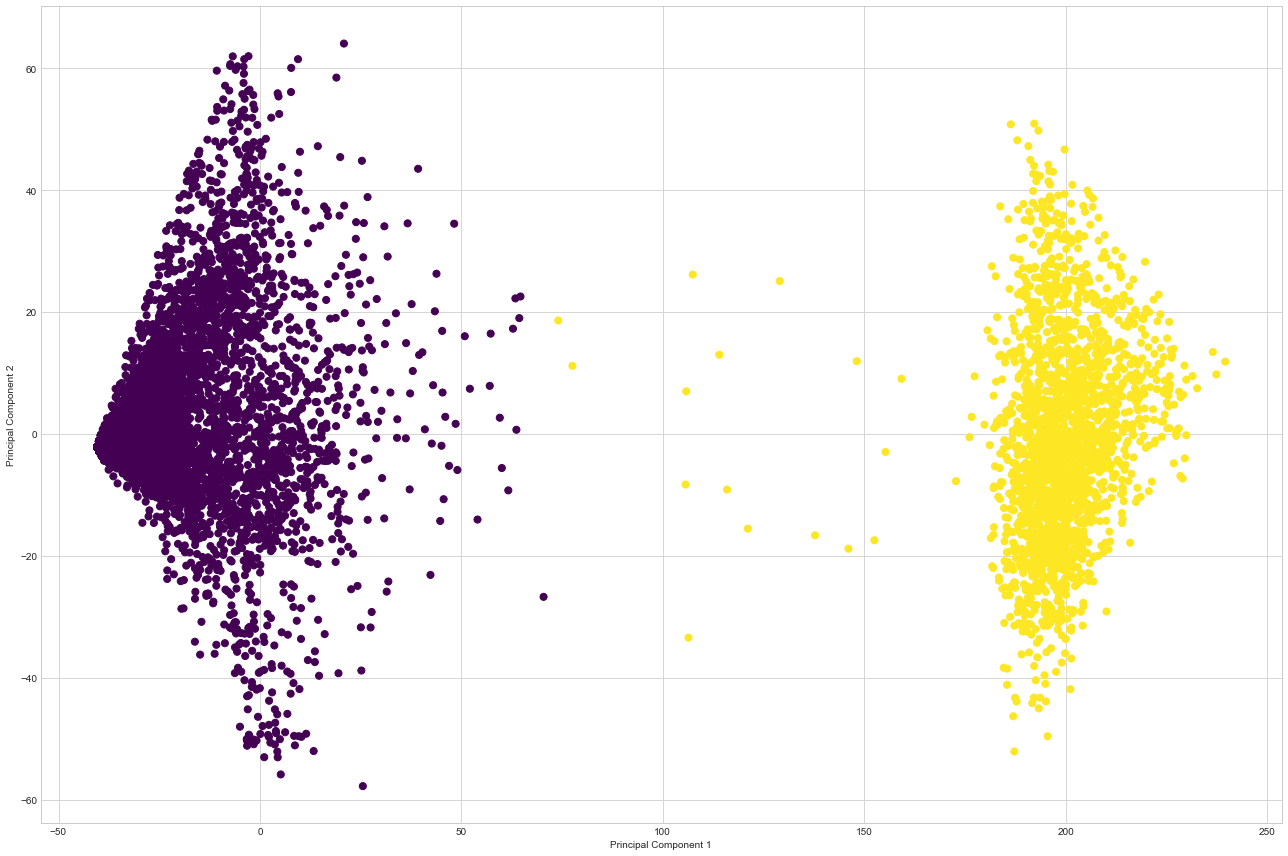

In [31]:
sklearn_pca = sklearnPCA(n_components=2)
plotData = sklearn_pca.fit_transform(data)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(18, 12))
    plt.scatter(plotData[:, 0], plotData[:, 1], c=hidden_states, s=50, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## K-Means

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

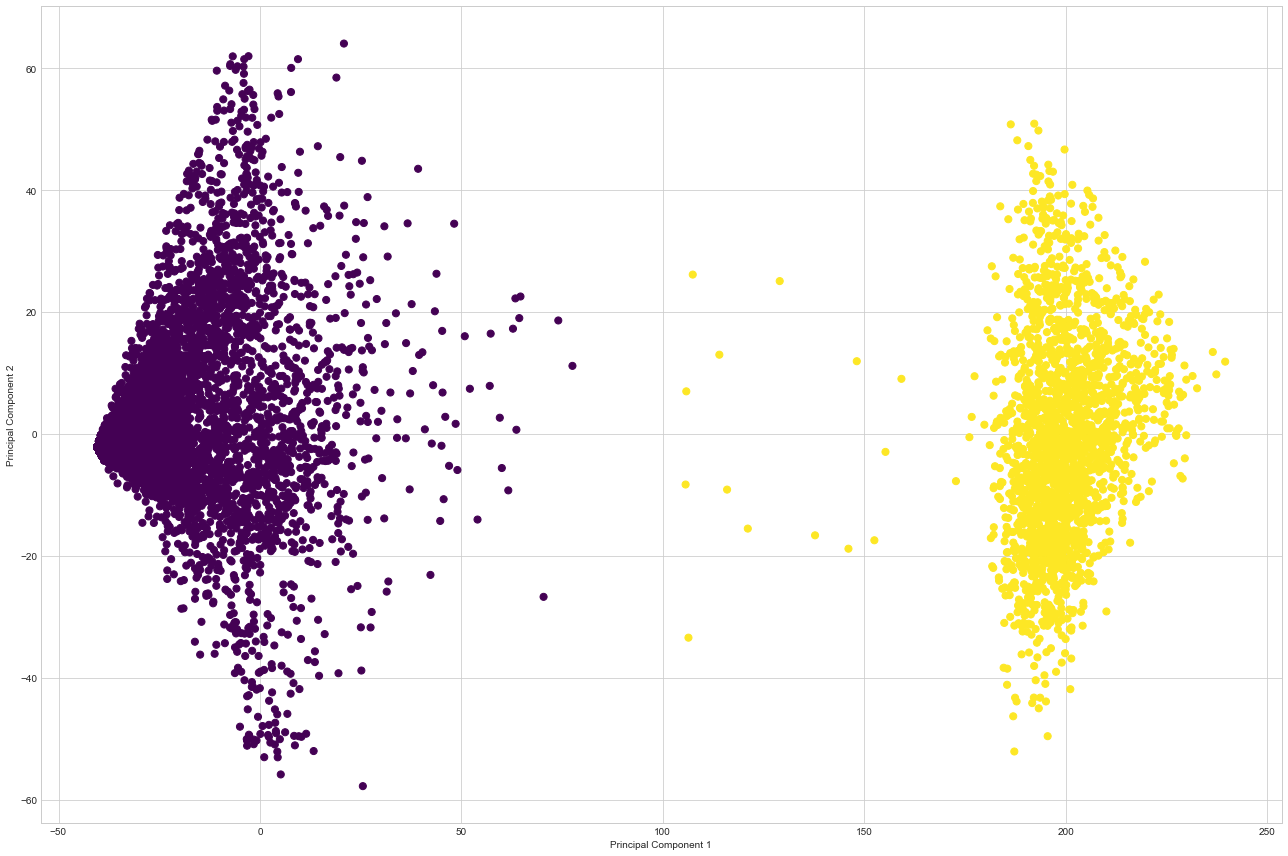

In [34]:
sklearn_pca2 = sklearnPCA(n_components=2)
plotData2 = sklearn_pca2.fit_transform(data)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(18, 12))
    plt.scatter(plotData2[:, 0], plotData2[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## Conclusion

The two algorithms work pretty well with this dataset. The results are almost the same. There are 2 different points between two algorithms in the middle of the figures above.